<a href="https://colab.research.google.com/github/Fuad3004/ANN-Artificial_Neural_Network/blob/main/ANN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn  as nn

import matplotlib.pyplot as plt


In [ ]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

#Train Model Function


In [ ]:
def train_model(x,t):

  ANNregression= nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  loss_fn = nn.MSELoss()
  optimizer= torch.optim.SGD(ANNregression.parameters(),lr=0.01)

  epochs =500
  losses= torch.zeros(epochs)

  for epoch in range(epochs):

    #Foeward pass
    yHat= ANNregression(x)


    #Calcualte the loss
    loss= loss_fn(yHat, y)
    losses[epoch]=loss


    #BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction=ANNregression(x)

  return prediction,losses



#Data Function

In [ ]:
def datafn(m):
  N=50
  x= torch.randn(N,1)
  y= m*x + torch.randn(N,1)/2

  return x,y

#Testing

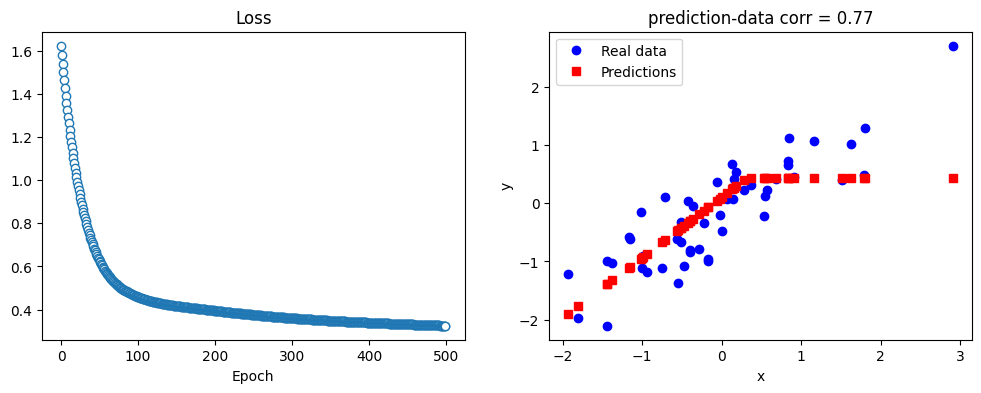

In [ ]:
# create a dataset
x,y = datafn(.8)

# run the model
yHat,losses = train_model(x,y)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()
